In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from wordcloud import WordCloud

from xgboost import XGBClassifier

from warnings import simplefilter
simplefilter("ignore")

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

# **NLP || SPAM VS HAM**

In [6]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Oasis Infobyte ankita ajmire\spam.csv", encoding='ISO-8859-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:


# Set display options for better visibility of column contents
pd.set_option('display.max_colwidth', None)

# Drop unnecessary columns
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Rename the first two columns for better readability
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

# Display the first few rows of the modified DataFrame
df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [8]:
df["text"].head(1)

0    Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Name: text, dtype: object

# Overview



# Main Observations from Dataset Overview

- The dataset contains a total of **5572 entries** and **2 columns** (label and text).
- **Categorical Data**: The dataset comprises two categorical columns: **label** (indicating 'ham' or 'spam') and **text** (the message content).
- The **head of the dataset** reveals that most messages labeled as **'ham'** are casual conversations, while the **'spam'** messages promote contests and prizes.
- The **tail of the dataset** highlights repeated spam messages, indicating attempts to lure users into calling for prize claims.
- The **numerical summary** shows 5572 instances of **ham** and 2 instances of **spam** messages, emphasizing a significant imbalance in message types.
- There are **no null values** present in the dataset, ensuring data completeness.
- The dataset has **403 duplicate entries**, which may need to be addressed for accurate analysis.
- The **shape** of the dataset is **(5572, 2)**, indicating that it contains **5572 rows** and **rding or details!

#  Drop Duplicates

In [10]:
df.drop_duplicates(inplace=True)


print(f"the number of number duplicates now in dataset  --> " ,   df.duplicated().sum())



the number of number duplicates now in dataset  -->  0


#  Target Class Distribuition 

<Axes: xlabel='label', ylabel='Count'>

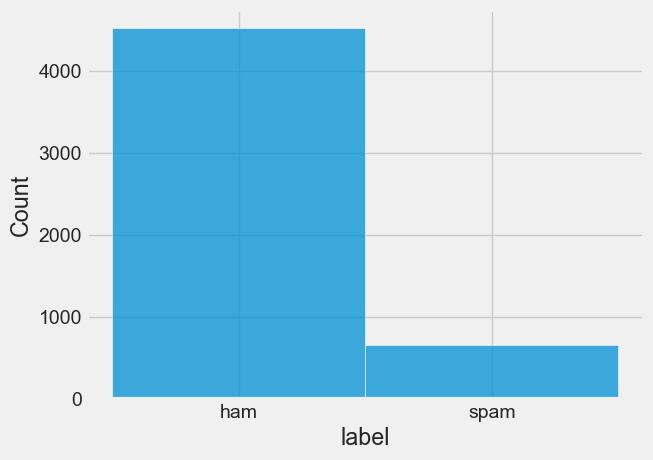

In [11]:
sns.histplot(df,x='label')


# WORLDCLOUDS

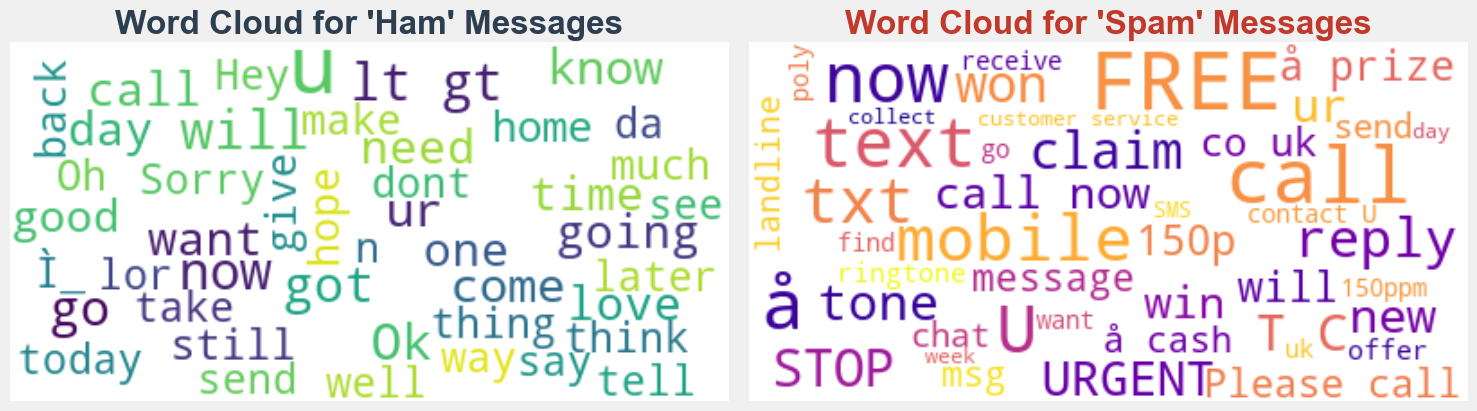

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Join all 'ham' and 'spam' messages into single texts
ham_text = ' '.join(df[df['label'] == 'ham']['text'])
spam_text = ' '.join(df[df['label'] == 'spam']['text'])

# Generate the word cloud for ham messages
ham_wordcloud = WordCloud(
    background_color='white',
    colormap='viridis',
    max_font_size=45,
    max_words=45,
    random_state=42
).generate(ham_text)

# Generate the word cloud for spam messages
spam_wordcloud = WordCloud(
    background_color='white',
    colormap='plasma',
    max_font_size=45,
    max_words=45,
    random_state=42
).generate(spam_text)

# Set up the figure for side-by-side display
plt.figure(figsize=(15, 7))  # Wider figure for better layout

# Plot for ham messages
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for 'Ham' Messages", fontsize=24, fontweight='bold', color='#2C3E50')

# Plot for spam messages
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for 'Spam' Messages", fontsize=24, fontweight='bold', color='#C0392B')

# Show the plots
plt.tight_layout()  # Adjust layout for better spacing
plt.show()




**Ham Messages:**
- The most frequently used words include:
  - **it**, **know**, **got**, **you**, **need**, **make**, **now**, **want**, **go**, **still**, **come**, **later**, etc.
- These words indicate casual, everyday conversation and a sense of personal engagement among users.

**Spam Messages:**
- The predominant words include:
  - **FREE**, **call**, **URGENT**, **STOP**, **tone**, **mobile**, **now**, etc.
- This language suggests an emphasis on promotions, urgent requests, and instructions typical of spam content.

These observations highlight the contrasting nature of communication in 'ham' versus 'spam' messages, reflecting the informal and personal tone of the former and the promotional and urgent tone of the latter.

# Modelling

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1331
        spam       0.97      0.87      0.92       220

    accuracy                           0.98      1551
   macro avg       0.98      0.93      0.95      1551
weighted avg       0.98      0.98      0.98      1551



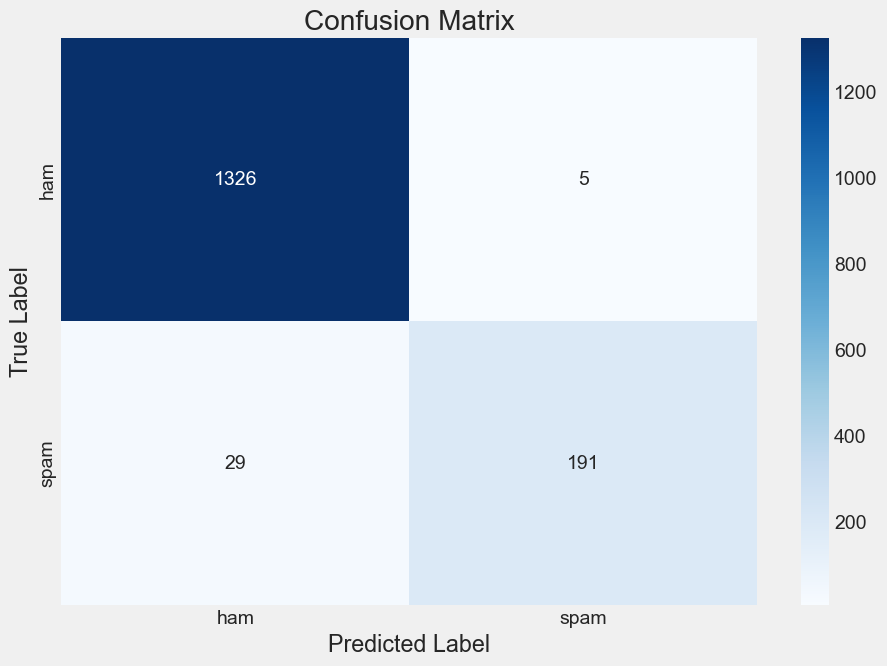

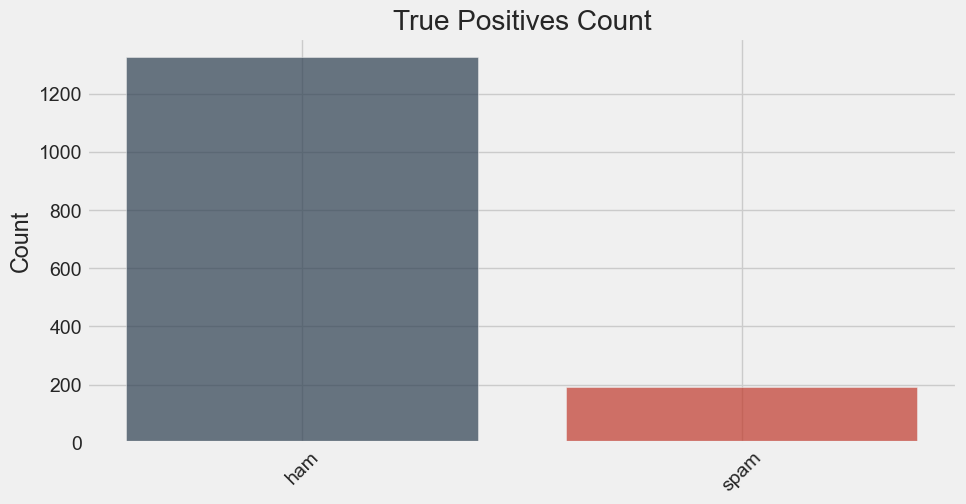

Accuracy of the model: 0.98


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Split the dataset
x = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Vectorization
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Modeling
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

# Evaluation
report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report)

# Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Additional Metrics Visualization
plt.figure(figsize=(10, 5))
plt.bar(['ham', 'spam'], [conf_matrix[0, 0], conf_matrix[1, 1]], color=['#2C3E50', '#C0392B'], alpha=0.7)
plt.title('True Positives Count')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy of the model: {accuracy:.2f}")


---